In [169]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, label_binarize

In [56]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

with zipfile.ZipFile('heart-disease-data.zip', 'r') as zip_ref:
    zip_ref.extractall('heart_disease_data')

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


<div style="color:red;">
  <h1>Data Dictionary:</h1>
  <ol>
    <li>id (Unique id for each patient)</li>
    <li>age (Age of the patient in years)</li>
    <li>origin (place of study)</li>
    <li>sex (Male/Female)</li>
    <li>cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])</li>
    <li>trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>chol (serum cholesterol in mg/dl)</li>
    <li>fbs (if fasting blood sugar > 120 mg/dl)</li>
    <li>restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]</li>
    <li>thalach: maximum heart rate achieved</li>
    <li>exang: exercise-induced angina (True/ False)</li>
    <li>oldpeak: ST depression induced by exercise relative to rest</li>
    <li>slope: the slope of the peak exercise ST segment</li>
    <li>ca: number of major vessels (0-3) colored by fluoroscopy</li>
    <li>thal: [normal; fixed defect; reversible defect]</li>
    <li>num: the predicted attribute</li>
  </ol>
</div>


## Data Exploring & Preprocessing

In [57]:
data = pd.read_csv('heart_disease_data/heart_disease_uci.csv', index_col = 0)
data.shape

(920, 15)

In [58]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [60]:
for col in data.columns:
    # If the column is of type object or category (likely to be categorical data)
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        print(f"Column '{col}' is categorical. Converting to numerical...")
        
        LE = LabelEncoder()
        
        data[col] = LE.fit_transform(data[col])

Column 'sex' is categorical. Converting to numerical...
Column 'dataset' is categorical. Converting to numerical...
Column 'cp' is categorical. Converting to numerical...
Column 'fbs' is categorical. Converting to numerical...
Column 'restecg' is categorical. Converting to numerical...
Column 'exang' is categorical. Converting to numerical...
Column 'slope' is categorical. Converting to numerical...
Column 'thal' is categorical. Converting to numerical...


In [61]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [62]:
data.describe()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,861.000000,890.000000,920.000000,920.000000,865.000000,920.000000,858.000000,920.000000,309.000000,920.000000,920.000000
mean,53.510870,0.789130,1.238043,0.782609,132.132404,199.130337,0.345652,0.994565,137.545665,0.485870,0.878788,1.823913,0.676375,2.215217,0.995652
std,9.424685,0.408148,1.130673,0.956350,19.066070,110.780810,0.649837,0.638767,25.926276,0.608085,1.091226,0.977146,0.935653,0.946551,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,120.000000,175.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,2.000000,2.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,3.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,2.000000,3.000000,202.000000,2.000000,6.200000,3.000000,3.000000,3.000000,4.000000


In [63]:
df1 = data.drop(columns=['ca','slope','thal'], inplace=False)
df1.dropna(inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1 to 920
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       827 non-null    int64  
 1   sex       827 non-null    int32  
 2   dataset   827 non-null    int32  
 3   cp        827 non-null    int32  
 4   trestbps  827 non-null    float64
 5   chol      827 non-null    float64
 6   fbs       827 non-null    int32  
 7   restecg   827 non-null    int32  
 8   thalch    827 non-null    float64
 9   exang     827 non-null    int32  
 10  oldpeak   827 non-null    float64
 11  num       827 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 64.6 KB


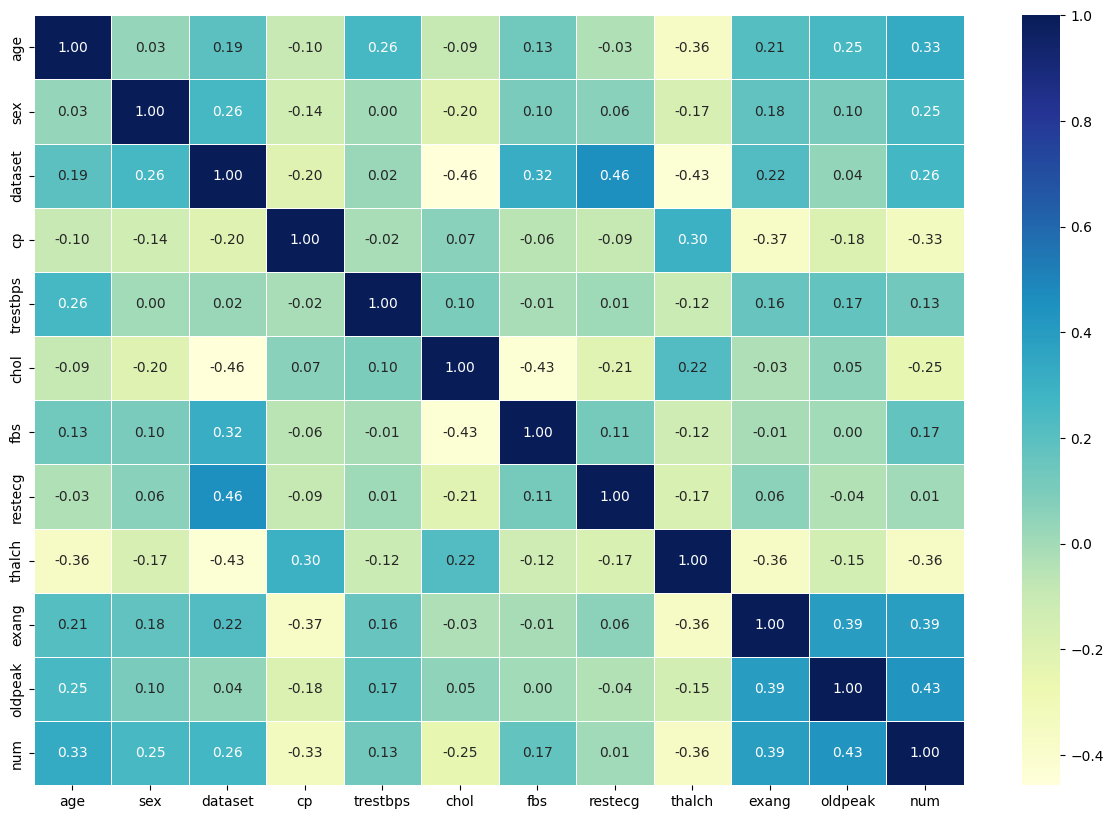

In [64]:
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [65]:
x = df1.drop("num",axis=1)
y = df1["num"]

In [66]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(y_train)

661

We are Going to try 3 different machine learning classification models:
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier

In [67]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test) :
    # to fit and evaluate machine learning models
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items() :
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [68]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.5662650602409639,
 'KNN': 0.45180722891566266,
 'Random Forest': 0.5602409638554217}

## HyperParameter Tuning By Hand (for KNN)

In [69]:
train_score = []
test_score = []
neighbors = range(1,31)
knn = KNeighborsClassifier()
for i in neighbors :
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

Maximum KNN score on the test data is 54.82%


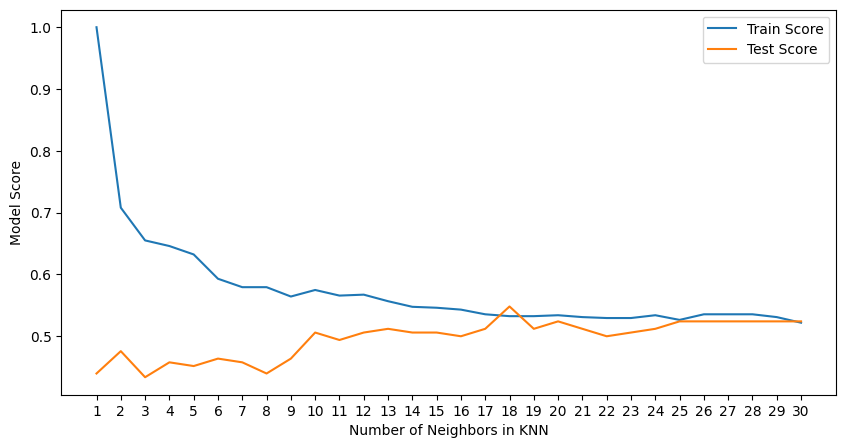

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors, train_score,label="Train Score")
plt.plot(neighbors, test_score,label="Test Score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel('Number of Neighbors in KNN')
plt.ylabel('Model Score')
plt.legend()
print(f"Maximum KNN score on the test data is {max(test_score)*100:0.2f}%")

## HyperParameter Tuning using RandomizedSerchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [76]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),                      # Regularization strength
    "solver": ["liblinear", "saga", "lbfgs", "newton-cg", "sag"],  # Solvers suited for different problems
    "penalty": ["l1", "l2", "elasticnet", "none"],    # Regularization type
    "max_iter": [100, 200, 300, 500, 1000, 2000, 5000],           # Maximum iterations for solvers
    "l1_ratio": np.linspace(0, 1, 10),                # ElasticNet mixing parameter (only used if penalty='elasticnet')
    "fit_intercept": [True, False],                   # Whether to fit the intercept
    "class_weight": ["balanced", None]                # Handling class imbalance
}


# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(100, 1001, 100),          # Number of trees (increased the range)
    "max_depth": [None, 10, 20, 30, 40, 50],            # Maximum depth of each tree
    "min_samples_split": np.arange(2, 21, 2),           # Minimum samples required to split an internal node
    "min_samples_leaf": np.arange(1, 21, 2),            # Minimum samples required to be at a leaf node
    "max_features": ['auto', 'sqrt', 'log2', None],     # Number of features to consider at each split
    "bootstrap": [True, False],                         # Whether bootstrap samples are used
    "class_weight": ['balanced', 'balanced_subsample', None],  # Handle class imbalance
    "max_samples": [None, 0.5, 0.75, 0.9]               # For bootstrap=True, specify a fraction of samples used for training
}


In [77]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logisti

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 100,
 'l1_ratio': 0.3333333333333333,
 'fit_intercept': True,
 'class_weight': None,
 'C': 4.281332398719396}

In [78]:
rs_log_reg.score(x_test, y_test)

0.608433734939759

In [74]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_rf.fit(x_train, y_train)
rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, ex

{'n_estimators': 800,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_samples': 0.75,
 'max_features': 'sqrt',
 'max_depth': 50,
 'class_weight': None,
 'bootstrap': True}

In [75]:
rs_rf.score(x_test, y_test)

0.5903614457831325

## HyperParameter Tuning using GridSerchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [106]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 5),                        # Regularization strength (slightly expanded)
    "solver": ["liblinear", "lbfgs", "newton-cg"],     # Added 'newton-cg'
    "penalty": ["l1", "l2", "none"],                   # Regularization type (no elasticnet to keep it simpler)
    "max_iter": [100, 500, 1000, 2000],                # Maximum iterations (moderate range)
    "fit_intercept": [True],                           # Fit intercept (keep it simple)
    "class_weight": ["balanced", None]                 # Handling class imbalance (simple and effective)
}


rf_grid = {
    "n_estimators": [100, 250, 500],                   # Number of trees (reduced range)
    "max_depth": [None, 10, 20],                       # Maximum depth of each tree (fewer values)
    "min_samples_split": [2, 5, 10],                   # Minimum samples required to split (simplified)
    "min_samples_leaf": [1, 5, 9],                     # Minimum samples required at a leaf node (simplified)
    "max_features": ['auto', 'sqrt', 'log2'],                  # Number of features to consider (reduced)
    "bootstrap": [True],                               # Bootstrap sampling (keep as default)
    "class_weight": ['balanced',None]                       # Handle class imbalance (keep the most common setting)
}



In [101]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(x_train, y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

{'C': 1.0,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [102]:
gs_log_reg.score(x_test, y_test)

0.6024096385542169

In [103]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)
gs_rf.fit(x_train, y_train)
gs_rf.best_params_

c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, ex

{'bootstrap': True,
 'class_weight': None,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 500}

In [104]:
gs_rf.score(x_test, y_test)

0.572289156626506

## Evaluating the Classification Model
* ROC Curve & AUC Score 
* Confusion Matrix
* Classification Report
* Precission
* Recall
* F1-Score

In [111]:
# Get the predictions of the model
y_preds = gs_log_reg.predict(x_test)

# Binarize the labels for each class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Get the predicted probabilities for each class
y_score = gs_log_reg.decision_function(x_test)

# One-vs-Rest ROC Curve:
Each class gets its own ROC curve, which can be visualized separately.

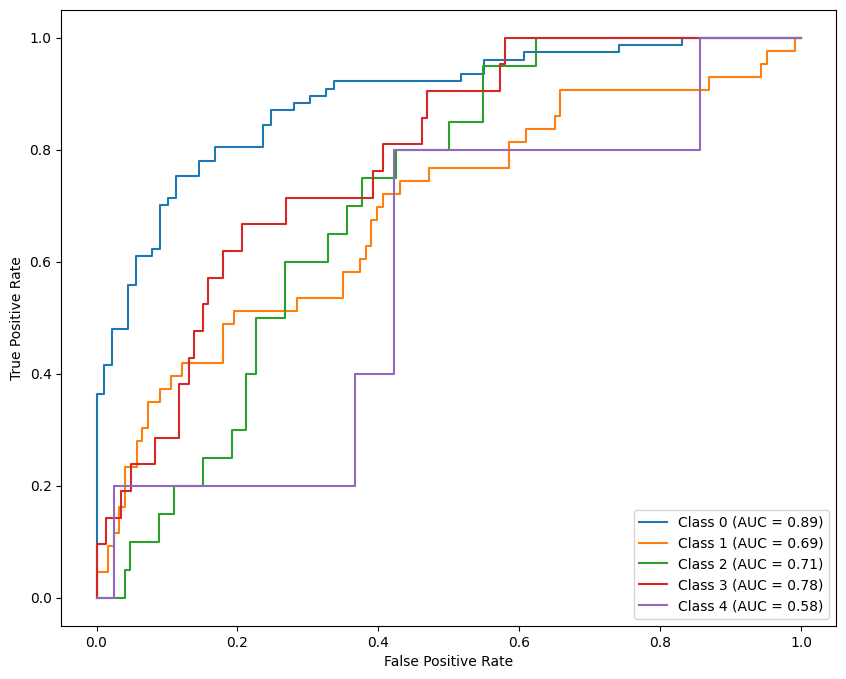

In [112]:
# Plot ROC curve for each class
n_classes = len(np.unique(y))
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Class {i}').plot(ax=ax)

plt.show()

# Micro/Macro Averaging:
 creates an average ROC curve summarizing performance across all classes.

<Figure size 800x600 with 0 Axes>

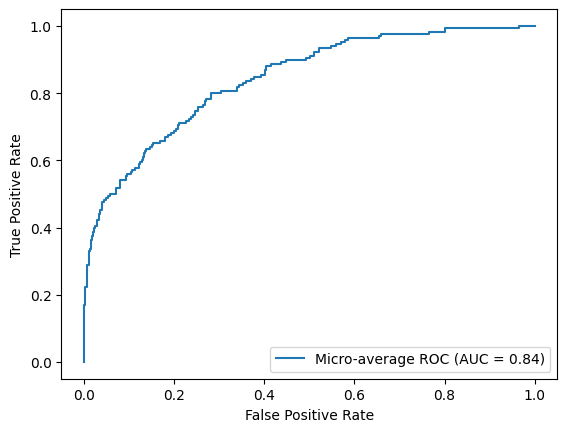

In [118]:
# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Micro-average ROC').plot()
plt.show()

## Confusion Matrix

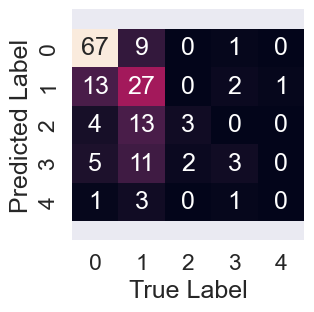

In [172]:
def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test,y_preds)

Now Let's calculate the Classification Report

In [161]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.43      0.63      0.51        43
           2       0.60      0.15      0.24        20
           3       0.43      0.14      0.21        21
           4       0.00      0.00      0.00         5

    accuracy                           0.60       166
   macro avg       0.44      0.36      0.35       166
weighted avg       0.58      0.60      0.56       166



but the Classification Report above is just for one sample of tests while a better result would yield by using cross-validation.

 so let's calculate Cross-Validated Classification Report using evluation metrics with `cross_val_score()`:

In [181]:
clf = LogisticRegression(**gs_log_reg.best_params_)

In [228]:
y_pred_cv = cross_val_predict(clf, x, y, cv=5)

report = classification_report(y, y_pred_cv, output_dict=True)
report_df = pd.DataFrame(report).transpose()


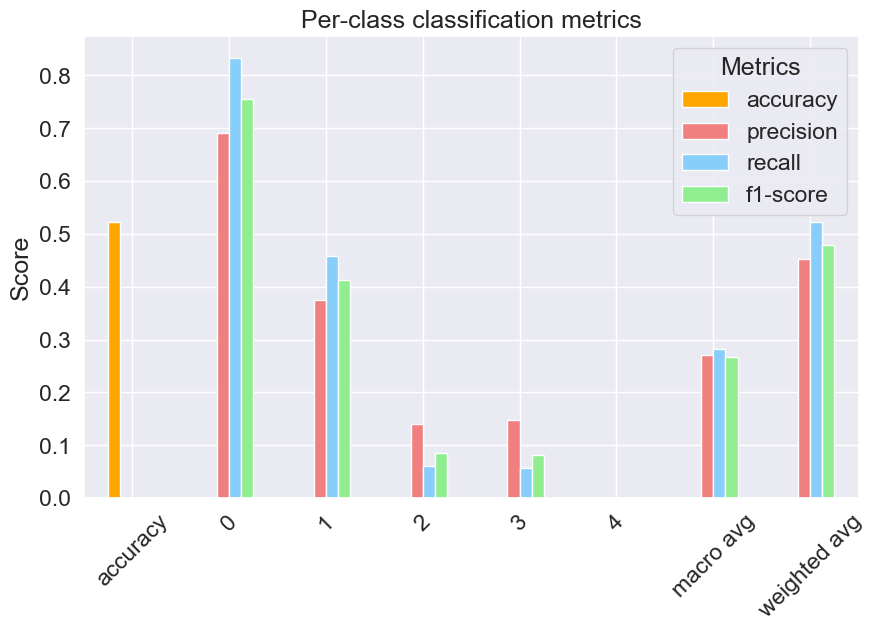

In [231]:
class_metrics = report_df.drop(index='accuracy')
accuracy_df = pd.DataFrame({'accuracy': report['accuracy']}, index=['accuracy'])

plot_data = pd.concat([accuracy_df, class_metrics[['precision', 'recall', 'f1-score']]], axis=1)

ax = plot_data.plot(kind='bar', figsize=(10, 6), 
                    title="Per-class classification metrics", 
                    color=['orange', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [242]:
plot_data

,accuracy,precision,recall,f1-score
accuracy,0.52237,NaN,NaN,NaN
0,NaN,0.691275,0.832884,0.755501
1,NaN,0.374582,0.459016,0.412523
2,NaN,0.139535,0.060606,0.084507
3,NaN,0.147059,0.056180,0.081301
4,NaN,0.000000,0.000000,0.000000
macro avg,NaN,0.270490,0.281737,0.266766
weighted avg,NaN,0.453160,0.522370,0.479502


# Feature Importance

In [253]:
clf.fit(x_train, y_train)

feature_df = pd.DataFrame(clf.coef_, columns=x.columns).T
feature_df

,0,1,2,3,4
age,-0.021533,-0.024944,0.028605,0.038140,0.051483
sex,-1.142326,0.662380,0.414468,0.275301,0.316298
dataset,-0.132677,0.102016,0.091525,-0.141664,-0.219622
cp,0.608986,-0.255579,-0.301789,-0.156949,-0.820662
trestbps,-0.004010,-0.000166,-0.010405,0.002233,-0.012052
chol,0.002405,0.001981,-0.004101,-0.003343,-0.001256
fbs,-0.746285,0.530150,-0.012247,0.092163,-0.120014
restecg,0.272674,0.046090,-0.174721,-0.246372,-0.574730
thalch,0.014781,-0.005227,-0.006835,-0.028265,-0.029238
exang,-1.013328,0.683140,0.115314,0.684790,-0.691162


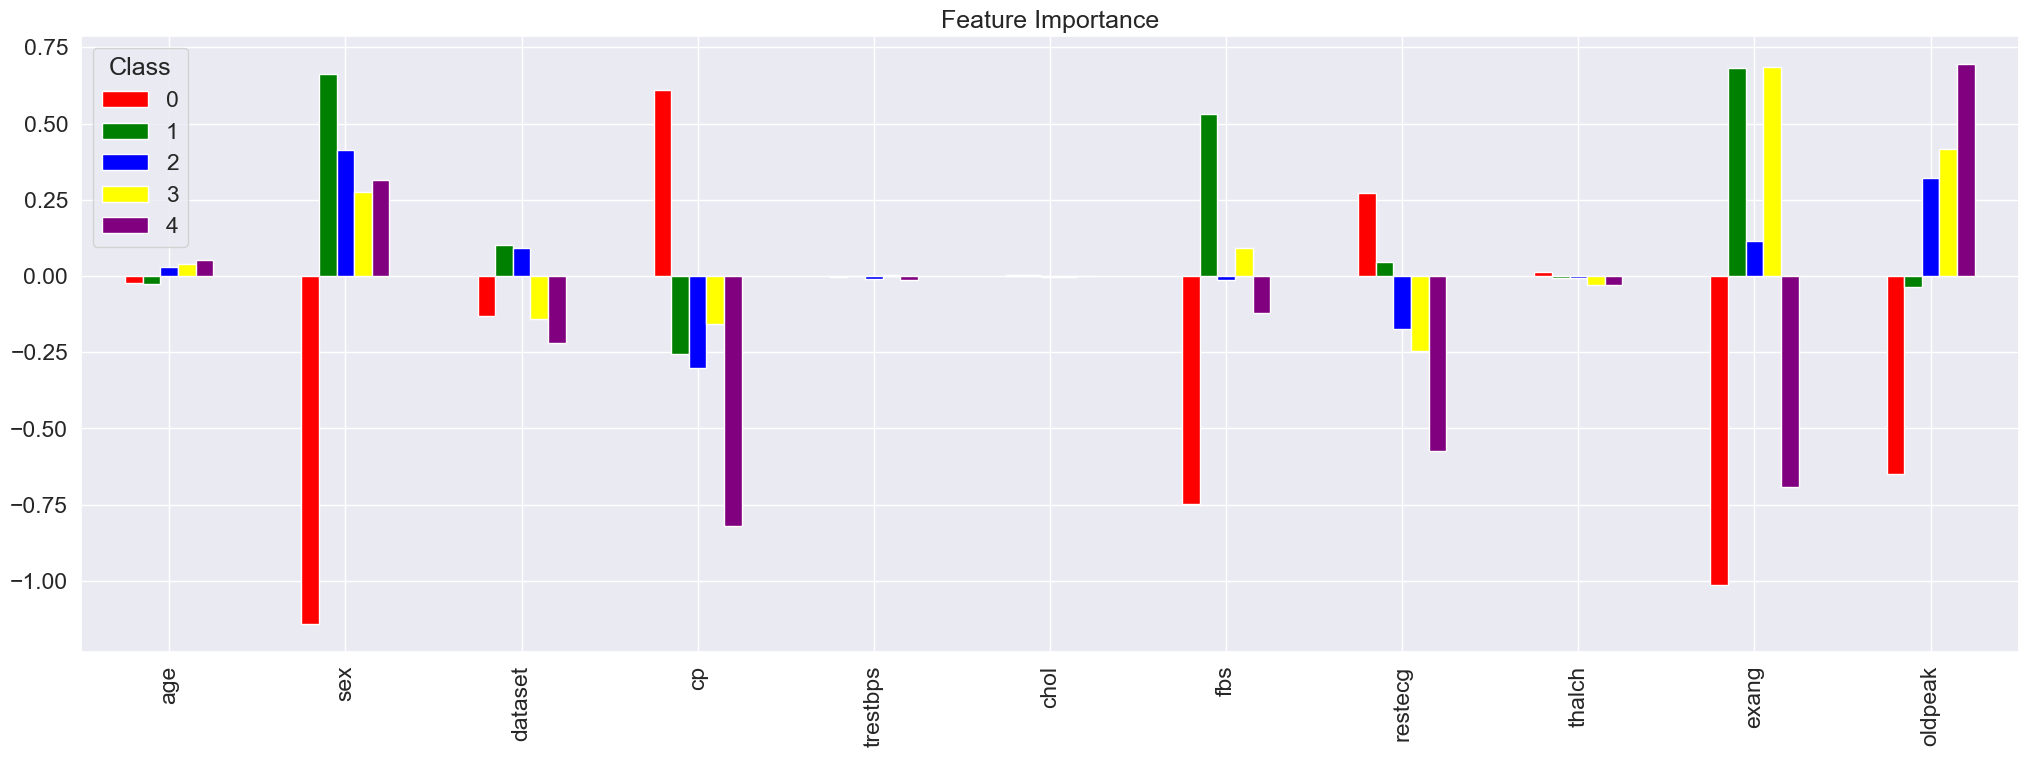

In [252]:
ax = feature_df.plot.bar(figsize=(25, 8), 
                    title="Feature Importance", 
                    color=['red', 'green', 'blue', 'yellow','purple'])
plt.legend(title='Class')
plt.show()

This is Called Model-Based Feature Importance.